### Import necessary libraries

In [ ]:
import pandas as pd

# 1. Data Collection and Manipulation

## 1.1 Automatic Download of Dataset

In [ ]:
!wget -q http://files.grouplens.org/datasets/movielens/ml-1m.zip

In [ ]:
!unzip -q ml-1m.zip

## 1.2 Save to csv files

In [ ]:
# Load the users file and save to CSV
users = pd.read_csv('ml-1m/users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')
users.to_csv('users.csv', index=False)

# Load the movies file and save to CSV
movies = pd.read_csv('ml-1m/movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')
movies.to_csv('movies.csv', index=False)

# Load the ratings file and save to CSV
ratings = pd.read_csv( 'ml-1m/ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='ISO-8859-1')
ratings.to_csv('ratings.csv', index=False)

## 1.3 Print the first few rows of the each dataframe

In [ ]:
# Print the first few rows of the users dataframe to check user details like user ID and demographics
print("First few rows of the users dataframe:")
print(users.head())
print("\n")  # Adds a newline for better separation of the output

# Print the first few rows of the movies dataframe to view movie information such as movie ID and title
print("First few rows of the movies dataframe:")
print(movies.head())
print("\n")  # Adds a newline for better separation of the output

# Print the first few rows of the ratings dataframe to inspect entries of user ratings for movies
print("First few rows of the ratings dataframe:")
print(ratings.head())

First few rows of the users dataframe:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


First few rows of the movies dataframe:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


First few rows of the ratings dataframe:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3   

## 1.4 Print the column names of the each dataframe

In [ ]:
# Print the column names of the users dataframe to understand the fields related to user information
print("Column names in the users dataframe:")
print(users.columns)
print("\n")  # Adds a newline for better separation of the output

# Print the column names of the movies dataframe to see the attributes associated with movies, such as titles and genres
print("Column names in the movies dataframe:")
print(movies.columns)
print("\n")  # Adds a newline for better separation of the output

# Print the column names of the ratings dataframe to review the fields that link users and movies through ratings
print("Column names in the ratings dataframe:")
print(ratings.columns)

Column names in the users dataframe:
Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')


Column names in the movies dataframe:
Index(['MovieID', 'Title', 'Genres'], dtype='object')


Column names in the ratings dataframe:
Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')


## 1.5 Checking for missing values in each dataframe

In [ ]:
# Display the number of missing values in each column of the users dataframe
print("Missing values in the users dataframe:")
print(users.isnull().sum())
print("\n")  # Adds a newline for better separation of output

# Display the number of missing values in each column of the movies dataframe
print("Missing values in the movies dataframe:")
print(movies.isnull().sum())
print("\n")  # Adds a newline for better separation of output

# Display the number of missing values in each column of the ratings dataframe
print("Missing values in the ratings dataframe:")
print(ratings.isnull().sum())

Missing values in the users dataframe:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


Missing values in the movies dataframe:
MovieID    0
Title      0
Genres     0
dtype: int64


Missing values in the ratings dataframe:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


## 1.6 Convert the 'Timestamp' column in the ratings dataframe from Unix time to datetime format.

In [ ]:
# This enhances readability and usability of the timestamp data for further analysis.
ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s')

# Display the first few rows of the ratings dataframe to confirm the successful conversion of the 'Timestamp' column.
print("First few rows of the ratings dataframe after converting 'Timestamp':")
print(ratings.head())

First few rows of the ratings dataframe after converting 'Timestamp':
   UserID  MovieID  Rating           Timestamp
0       1     1193       5 2000-12-31 22:12:40
1       1      661       3 2000-12-31 22:35:09
2       1      914       3 2000-12-31 22:32:48
3       1     3408       4 2000-12-31 22:04:35
4       1     2355       5 2001-01-06 23:38:11


## 1.7  Merge the ratings dataframe with the movies dataframe on the MovieID column.


In [ ]:
# This step combines movie rating data with corresponding movie details.
merged_data = pd.merge(ratings, movies, on='MovieID')

# Further merge the resulting dataframe with the users dataframe on the UserID column.
# This addition includes user demographic details into the merged dataset.
merged_data = pd.merge(merged_data, users, on='UserID')

# Display the column names of the merged dataframe to verify successful merges and to understand the available data fields.
print("Columns in the merged dataframe:")
print(merged_data.columns)

Columns in the merged dataframe:
Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')


## 1.6 Removing Duplicates

In [ ]:
dup_bool = merged_data.duplicated(['UserID','MovieID','Rating','Timestamp'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


# 2. Exploratory Data Analysis

## 2.1 Basic Statistics

In [ ]:
# Summary statistics for numerical columns
print(merged_data.describe())

# Value counts for categorical data
print(merged_data['Gender'].value_counts())  # Gender distribution
print(merged_data['Genres'].value_counts())  # Genres distribution


             UserID       MovieID        Rating  \
count  1.000209e+06  1.000209e+06  1.000209e+06   
mean   3.024512e+03  1.865540e+03  3.581564e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.506000e+03  1.030000e+03  3.000000e+00   
50%    3.070000e+03  1.835000e+03  4.000000e+00   
75%    4.476000e+03  2.770000e+03  4.000000e+00   
max    6.040000e+03  3.952000e+03  5.000000e+00   
std    1.728413e+03  1.096041e+03  1.117102e+00   

                           Timestamp           Age    Occupation  
count                        1000209  1.000209e+06  1.000209e+06  
mean   2000-10-22 19:41:35.404665856  2.973831e+01  8.036138e+00  
min              2000-04-25 23:05:32  1.000000e+00  0.000000e+00  
25%              2000-08-03 11:37:17  2.500000e+01  2.000000e+00  
50%              2000-10-31 18:46:46  2.500000e+01  7.000000e+00  
75%              2000-11-26 06:42:19  3.500000e+01  1.400000e+01  
max              2003-02-28 17:49:50  5.600000e+01  2.000000e+01  
std 

## 2.2 Rating Distribution Visualization

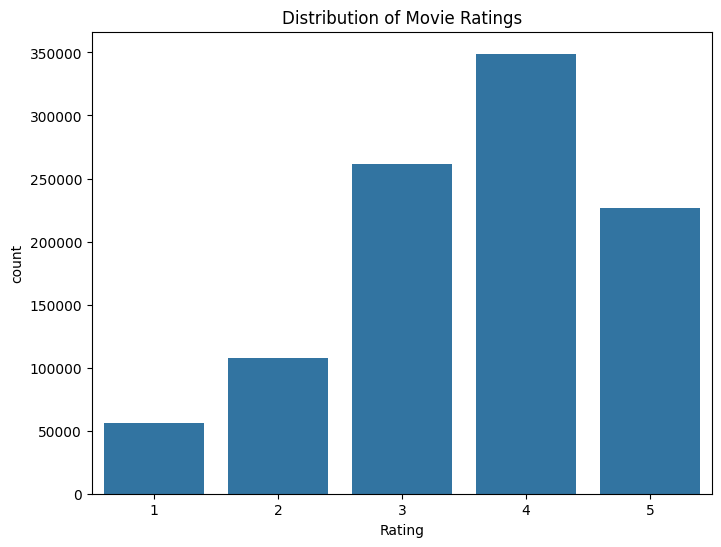

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=ratings)
plt.title('Distribution of Movie Ratings')
plt.show()


## 2.3 Calculate average rating per movie

In [ ]:
# Calculate average rating per movie
movie_avg_rating = ratings.groupby('MovieID')['Rating'].mean().sort_values(ascending=False).head(10)

# Merge with movie titles
top_avg_rated_movies = pd.merge(movie_avg_rating, movies, on='MovieID')

print("Top 10 highest average rated movies:")
print(top_avg_rated_movies[['Title', 'Rating']])


Top 10 highest average rated movies:
                                       Title  Rating
0  Schlafes Bruder (Brother of Sleep) (1995)     5.0
1                   Bittersweet Motel (2000)     5.0
2                    Follow the Bitch (1998)     5.0
3                     Song of Freedom (1936)     5.0
4         Gate of Heavenly Peace, The (1995)     5.0
5                           Baby, The (1973)     5.0
6                   One Little Indian (1973)     5.0
7                       Smashing Time (1967)     5.0
8                    Ulysses (Ulisse) (1954)     5.0
9                               Lured (1947)     5.0


## 2.4 Visualize Rating Distribution by Gender

Average rating by gender:
Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64


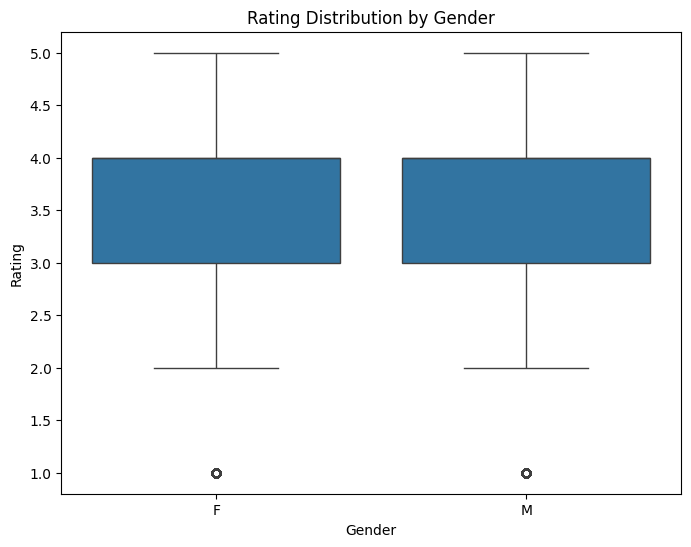

In [ ]:
# Average rating by gender
gender_avg_rating = merged_data.groupby('Gender')['Rating'].mean()

print("Average rating by gender:")
print(gender_avg_rating)

# Visualize the gender distribution in ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Rating', data=merged_data)
plt.title('Rating Distribution by Gender')
plt.show()


## 2.5 Calculate Number of Ratings per User

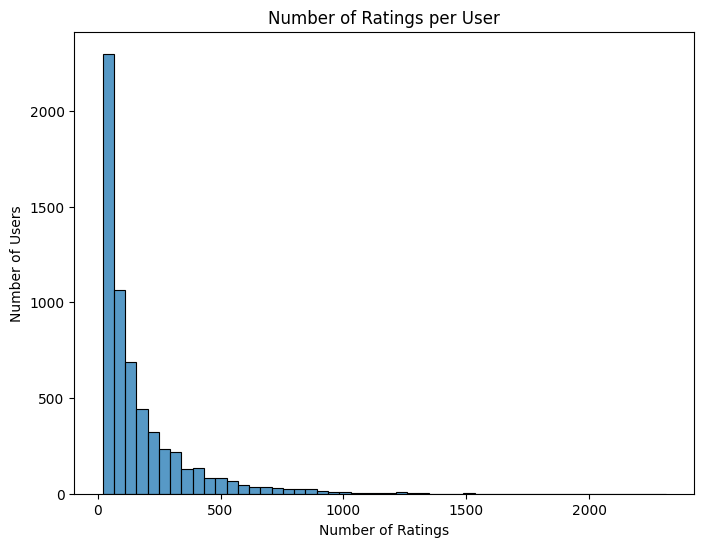

In [ ]:
# Number of ratings per user
user_rating_count = ratings.groupby('UserID').size().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.histplot(user_rating_count, bins=50, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


# 3. Implementation of Recommendations Methods

## 3.1 User-based Collaborative Filtering

### 3.1.1 Install and use the surprise library

In [ ]:
#!pip install scikit-surprise
from surprise import Dataset, Reader, KNNWithMeans, accuracy
from surprise.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=94712faec155c3c38c3a4171a3ebe29878af586151539e39b7798d3765d06463
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


### 3.1.2 Split into training and test sets

In [ ]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(merged_data[['UserID','MovieID','Rating']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

### 3.1.3 Implement user-based collaborative filtering

Here we utilize KNNWithMeans algorithm from the surprise library. It is a collaborative filtering algorithm that enhances the classic K-Nearest Neighbors (KNN) algorithm. In KNN-based algorithms, recommendations are generated by looking at the similarity between users or items, but KNNWithMeans adds a mean-centering step to account for user or item biases. Instead of directly using the raw ratings, it subtracts the mean rating of a user or an item from individual ratings to adjust for biases.

In [ ]:
sim_options_user_based = {
    "name": "cosine",
    "user_based": True,  # Compute similarities between users
}

# Initialize the KNNWithMeans algorithm with the similarity options
algo_user_based = KNNWithMeans(sim_options=sim_options_user_based)

# Train the algorithm on the trainset
algo_user_based.fit(trainset)

# Test the algorithm on the test set
predictions_user_based = algo_user_based.test(testset)

# Calculate accuracy (e.g., RMSE)
accuracy.rmse(predictions_user_based)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9417


0.9417291730276547

### 3.1.4 Predict rating for a specific user and movie
TODO: find a better way to visualize the predictions for several users and movies, also compare with the actual ratings

In [ ]:
merged_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [ ]:
user_id = 1
movie_id = 1193
prediction = algo_user_based.predict(user_id, movie_id)
print(prediction)


user: 1          item: 1193       r_ui = None   est = 4.81   {'actual_k': 40, 'was_impossible': False}


## 3.3 Item-based Collaborative Filtering

In [ ]:
# Item-based filtering: we determine the similarities based on the movies
# instead of looking at ratings from similar users
# we look at ratings from similar movies
sim_options_movie_based = {
    "name": "cosine",
    "user_based": False,  # Compute similarities between movies
}

# Initialize the KNNWithMeans algorithm with the similarity options
algo_movie_based = KNNWithMeans(sim_options=sim_options_movie_based)

# Train the algorithm on the trainset
algo_movie_based.fit(trainset)

# Test the algorithm on the test set
predictions_movie_based = algo_movie_based.test(testset)

# Calculate accuracy (e.g., RMSE)
accuracy.rmse(predictions_movie_based)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8963


0.8962819578861574

## 3.4 Matrix Factorization

###3.4.1 Matrix factorization using SVD




In [ ]:
from surprise import Dataset, Reader, KNNWithMeans, SVD, accuracy
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(merged_data[['UserID','MovieID','Rating']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

In [ ]:
predictions_svd

[Prediction(uid=4104, iid=3702, r_ui=3.0, est=3.063573624849159, details={'was_impossible': False}),
 Prediction(uid=5539, iid=1211, r_ui=4.0, est=3.992980384590431, details={'was_impossible': False}),
 Prediction(uid=2142, iid=454, r_ui=4.0, est=3.4552129784966406, details={'was_impossible': False}),
 Prediction(uid=3871, iid=2174, r_ui=3.0, est=3.440207281588182, details={'was_impossible': False}),
 Prediction(uid=4277, iid=3271, r_ui=4.0, est=4.620037975983849, details={'was_impossible': False}),
 Prediction(uid=4471, iid=1060, r_ui=4.0, est=3.8594822650286496, details={'was_impossible': False}),
 Prediction(uid=3033, iid=595, r_ui=5.0, est=3.5265182203861345, details={'was_impossible': False}),
 Prediction(uid=5100, iid=3397, r_ui=4.0, est=4.357103373356144, details={'was_impossible': False}),
 Prediction(uid=5262, iid=2628, r_ui=3.0, est=2.8401877684797787, details={'was_impossible': False}),
 Prediction(uid=5557, iid=1573, r_ui=1.0, est=3.179006074257469, details={'was_impossible

In [ ]:
print("SVD RMSE:")
accuracy.rmse(predictions_svd)

SVD RMSE:
RMSE: 0.8776


0.8775899318379707

In [ ]:
user_id = 1
movie_id = 1193
prediction_svd = algo_svd.predict(user_id, movie_id)
print(f"Prediction for User {user_id} on Movie {movie_id} (SVD):")
print(prediction_svd)

Prediction for User 1 on Movie 1193 (SVD):
user: 1          item: 1193       r_ui = None   est = 4.48   {'was_impossible': False}


## 3.5 Model-based Collaborative Filtering

### 3.5.1 Neural Collaborative Filtering